<a href="https://colab.research.google.com/github/djdumpling/Machine-Learning-Prince-/blob/main/5_1_Least_Squares_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [ ]:
def shallow_nn(x, beta_0, omega_0, beta_1, omega_1):
    # Make sure that input data is (1 x n_data) array
    n_data = x.size
    x = np.reshape(x,(1,n_data))

    # This runs the network for ALL of the inputs, x at once so we can draw graph
    h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(omega_0,x))
    y = np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(omega_1,h1)
    return y

In [ ]:
def get_parameters():
  # And we'll create a network that approximately fits it
  beta_0 = np.zeros((3,1));  # formerly theta_x0
  omega_0 = np.zeros((3,1)); # formerly theta_x1
  beta_1 = np.zeros((1,1));  # formerly phi_0
  omega_1 = np.zeros((1,3)); # formerly phi_x

  beta_0[0,0] = 0.3; beta_0[1,0] = -1.0; beta_0[2,0] = -0.5
  omega_0[0,0] = -1.0; omega_0[1,0] = 1.8; omega_0[2,0] = 0.65
  beta_1[0,0] = 0.1;
  omega_1[0,0] = -2.0; omega_1[0,1] = -1.0; omega_1[0,2] = 7.0

  return beta_0, omega_0, beta_1, omega_1

In [ ]:
def plot_univariate_regression(x_model, y_model, x_data = None, y_data = None, sigma_model = None, title= None):
  # Make sure model data are 1D arrays
  x_model = np.squeeze(x_model)
  y_model = np.squeeze(y_model)

  fig, ax = plt.subplots()
  ax.plot(x_model,y_model)
  if sigma_model is not None:
    ax.fill_between(x_model, y_model-2*sigma_model, y_model+2*sigma_model, color='lightgray')
  ax.set_xlabel(r'Input, x'); ax.set_ylabel(r'Output, y')
  ax.set_xlim([0,1]); ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if title is not None:
    ax.set_title(title)
  if x_data is not None:
    ax.plot(x_data, y_data, 'ko')
  plt.show()

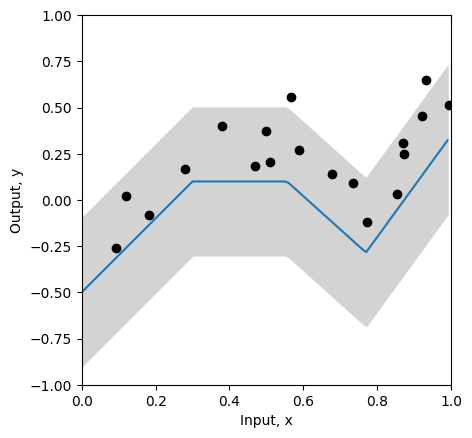

In [ ]:
# Let's create some 1D training data
x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.25934537,0.18195445,0.651270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.20716968,-0.08131792,0.51187806,0.16943738,0.3994327,\
                    0.019062570,0.55820410,0.452564960,-0.1183121,0.02957665,-1.24354444, \
                    0.248038840,0.26824970])

# Get parameters for the model
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2

# Define a range of input values
x_model = np.arange(0,1,0.01)
# Run the model to get values to plot and plot it.
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma)

In [ ]:
def normal_distribution(y, mu, sigma):
  prob = 1/np.sqrt(2 * math.pi * sigma**2) * np.exp(-(y-mu)**2/(2*sigma**2))
  return prob

In [ ]:
print("Correct answer = %3.3f, Your answer = %3.3f"%(0.119,normal_distribution(1,-1,2.3)))

Correct answer = 0.119, Your answer = 0.119


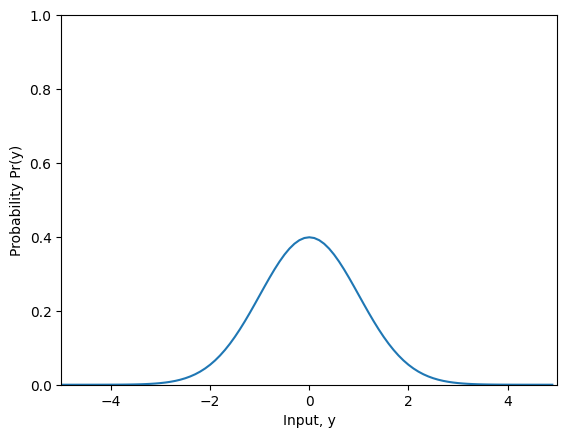

In [ ]:
y_gauss = np.arange(-5,5,0.1)
mu = 0; sigma = 1
gauss_prob = normal_distribution(y_gauss, mu, sigma)
fig, ax = plt.subplots()
ax.plot(y_gauss, gauss_prob)
ax.set_xlabel(r'Input, y'); ax.set_ylabel(r'Probability Pr(y)')
ax.set_xlim([-5,5]);ax.set_ylim([0,1.0])
plt.show()

In [ ]:
def compute_likelihood(y_train, mu, sigma):
  array = np.zeros_like(y_train, dtype=float)
  mu = mu.flatten()
  for i in range(len(y_train)):
    array[i] = normal_distribution(y_train[i], mu[i], sigma)
  likelihood = np.prod(array)
  return likelihood

In [ ]:
y_n=[0.1,0.2,0.3]
meow=[0.4,0.5,0.6]
sigma=0.2
compute_likelihood(y_n,meow, sigma)

0.2715790933044636

In [ ]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2

In [ ]:
likelihood = compute_likelihood(y_train, mu_pred, sigma)
print("Correct answer = %9.9f, Your answer = %9.9f"%(0.000010624,likelihood))

Correct answer = 0.000010624, Your answer = 0.000010624


In [ ]:
def compute_negative_log_likelihood(y_train, mu, sigma):
  array = np.zeros_like(y_train)
  mu = mu.flatten()
  for i in range(len(y_train)):
    array[i] = np.log(normal_distribution(y_train[i], mu[i], sigma))
  nll = np.sum(array)
  return -nll

In [ ]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian
mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sigma = 0.2
nll = compute_negative_log_likelihood(y_train, mu_pred, sigma)
print("Correct answer = %9.9f, Your answer = %9.9f"%(11.452419564,nll))

Correct answer = 11.452419564, Your answer = 11.452419564


In [ ]:
def compute_sum_of_squares(y_train, y_pred):
  sum_of_squares = 0
  y_pred = y_pred.flatten()
  for i in range(len(y_train)):
    sum_of_squares += (y_train[i]-y_pred[i])**2
  return sum_of_squares

In [ ]:
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Use our neural network to predict the mean of the Gaussian, which is out best prediction of y
y_pred = mu_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
sum_of_squares = compute_sum_of_squares(y_train, y_pred)
print("Correct answer = %9.9f, Your answer = %9.9f"%(2.020992572,sum_of_squares))

Correct answer = 2.020992572, Your answer = 2.020992572


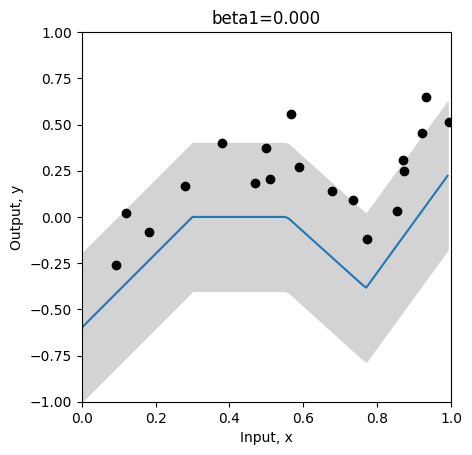

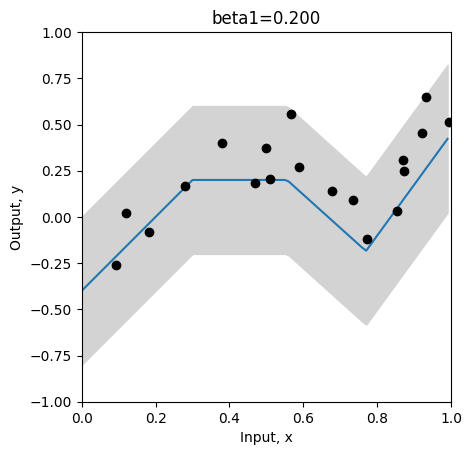

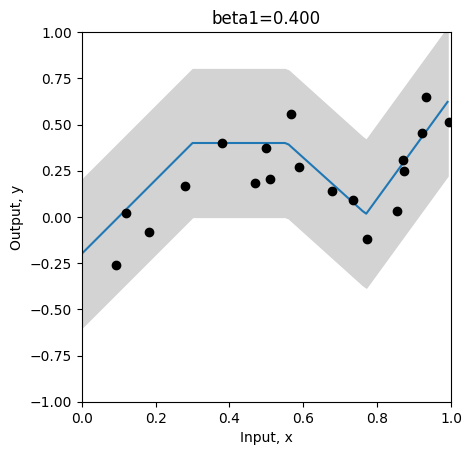

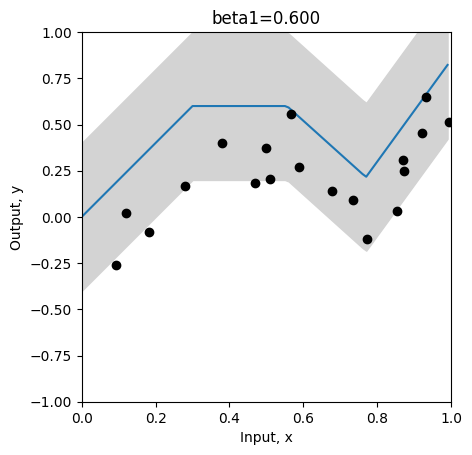

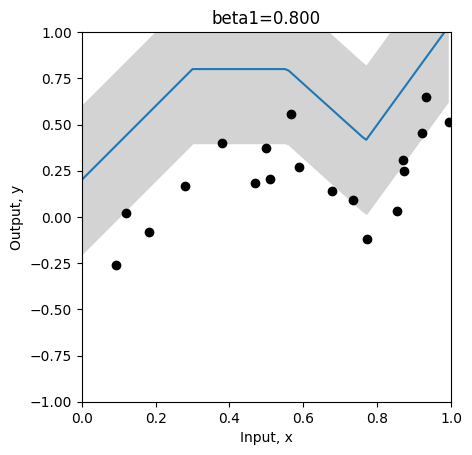

In [ ]:
# Define a range of values for the parameter
beta_1_vals = np.arange(0,1.0,0.01)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(beta_1_vals)
nlls = np.zeros_like(beta_1_vals)
sum_squares = np.zeros_like(beta_1_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
sigma = 0.2
for count in range(len(beta_1_vals)):
  # Set the value for the parameter
  beta_1[0,0] = beta_1_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))


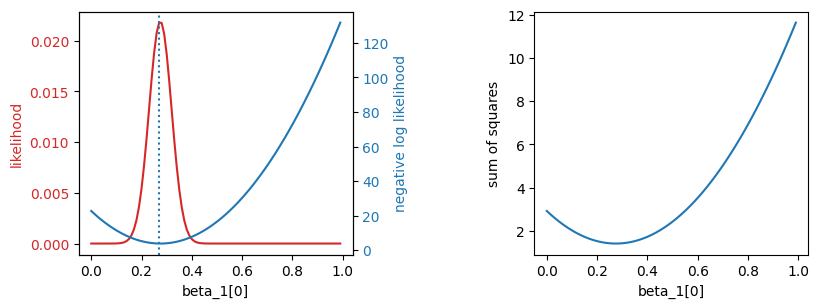

In [ ]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the offset beta1
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'

ax[0].set_xlabel('beta_1[0]')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(beta_1_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(beta_1_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = beta_1_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(beta_1_vals, sum_squares); ax[1].set_xlabel('beta_1[0]'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.022, at beta_1=0.270
Minimum negative log likelihood = 3.826, at beta_1=0.270
Least squares = 1.411, at beta_1=0.270


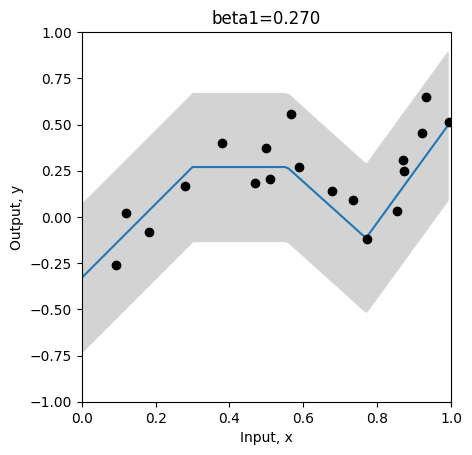

In [ ]:
print("Maximum likelihood = %3.3f, at beta_1=%3.3f"%( (likelihoods[np.argmax(likelihoods)],beta_1_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at beta_1=%3.3f"%( (nlls[np.argmin(nlls)],beta_1_vals[np.argmin(nlls)])))
print("Least squares = %3.3f, at beta_1=%3.3f"%( (sum_squares[np.argmin(sum_squares)],beta_1_vals[np.argmin(sum_squares)])))

# Plot the best model
beta_1[0,0] = beta_1_vals[np.argmin(sum_squares)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta1=%3.3f"%(beta_1[0,0]))

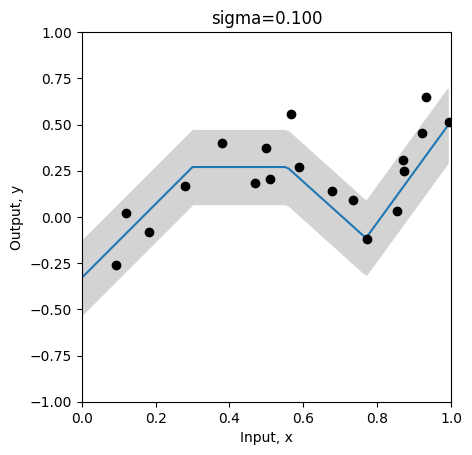

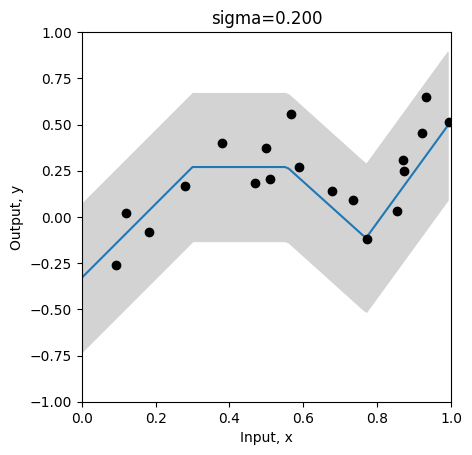

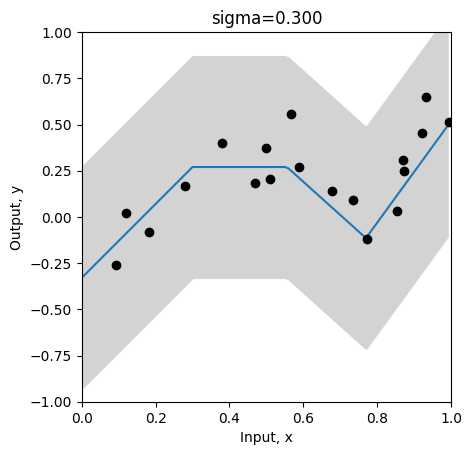

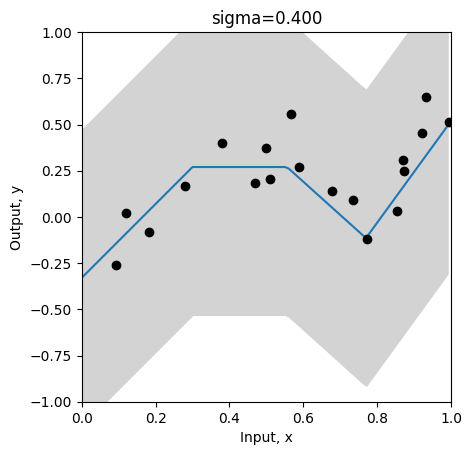

In [ ]:
# Define a range of values for the parameter
sigma_vals = np.arange(0.1,0.5,0.005)
# Create some arrays to store the likelihoods, negative log likelihoods and sum of squares
likelihoods = np.zeros_like(sigma_vals)
nlls = np.zeros_like(sigma_vals)
sum_squares = np.zeros_like(sigma_vals)

# Initialise the parameters
beta_0, omega_0, beta_1, omega_1 = get_parameters()
# Might as well set to the best offset
beta_1[0,0] = 0.27
for count in range(len(sigma_vals)):
  # Set the value for the parameter
  sigma = sigma_vals[count]
  # Run the network with new parameters
  mu_pred = y_pred = shallow_nn(x_train, beta_0, omega_0, beta_1, omega_1)
  # Compute and store the three values
  likelihoods[count] = compute_likelihood(y_train, mu_pred, sigma)
  nlls[count] = compute_negative_log_likelihood(y_train, mu_pred, sigma)
  sum_squares[count] = compute_sum_of_squares(y_train, y_pred)
  # Draw the model for every 20th parameter setting
  if count % 20 == 0:
    # Run the model to get values to plot and plot it.
    y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
    plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model=sigma, title="sigma=%3.3f"%(sigma))


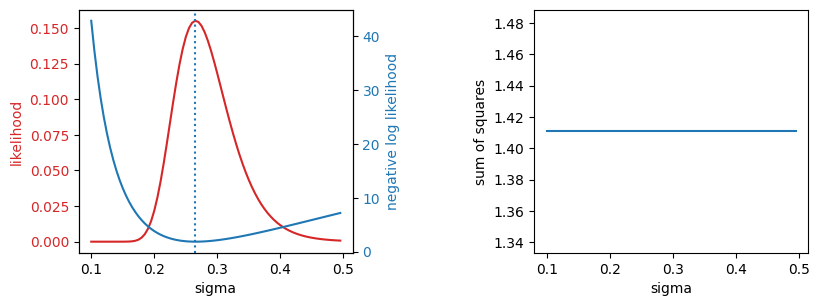

In [ ]:
# Now let's plot the likelihood, negative log likelihood, and least squares as a function of the value of the standard deviation sigma
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10.5, 5.5)
fig.tight_layout(pad=10.0)
likelihood_color = 'tab:red'
nll_color = 'tab:blue'


ax[0].set_xlabel('sigma')
ax[0].set_ylabel('likelihood', color = likelihood_color)
ax[0].plot(sigma_vals, likelihoods, color = likelihood_color)
ax[0].tick_params(axis='y', labelcolor=likelihood_color)

ax00 = ax[0].twinx()
ax00.plot(sigma_vals, nlls, color = nll_color)
ax00.set_ylabel('negative log likelihood', color = nll_color)
ax00.tick_params(axis='y', labelcolor = nll_color)

plt.axvline(x = sigma_vals[np.argmax(likelihoods)], linestyle='dotted')

ax[1].plot(sigma_vals, sum_squares); ax[1].set_xlabel('sigma'); ax[1].set_ylabel('sum of squares')
plt.show()

Maximum likelihood = 0.155, at sigma=0.265
Minimum negative log likelihood = 1.864, at sigma=0.265


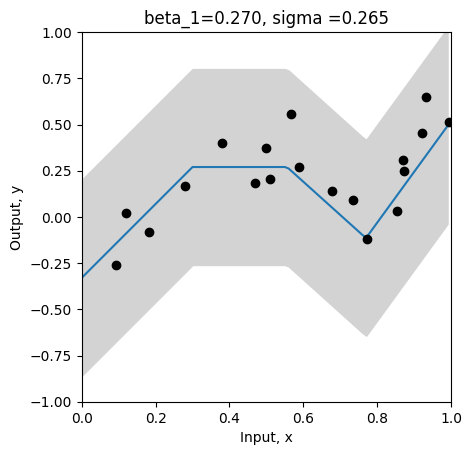

In [ ]:
# Hopefully, you can see that the maximum of the likelihood fn is at the same position as the minimum negative log likelihood
# The least squares solution does not depend on sigma, so it's just flat -- no use here.
# Let's check that:
print("Maximum likelihood = %3.3f, at sigma=%3.3f"%( (likelihoods[np.argmax(likelihoods)],sigma_vals[np.argmax(likelihoods)])))
print("Minimum negative log likelihood = %3.3f, at sigma=%3.3f"%( (nlls[np.argmin(nlls)],sigma_vals[np.argmin(nlls)])))
# Plot the best model
sigma= sigma_vals[np.argmin(nlls)]
y_model = shallow_nn(x_model, beta_0, omega_0, beta_1, omega_1)
plot_univariate_regression(x_model, y_model, x_train, y_train, sigma_model = sigma, title="beta_1=%3.3f, sigma =%3.3f"%(beta_1[0,0],sigma))
